## **Time Series ForeCasting**

Time Series Forecasting is the process of predicting future values based on previously observed values in a time series data. A time series is a sequence of data points recorded over a period of time at regular intervals, such as daily stock prices, monthly sales, or yearly weather temperatures. Forecasting involves using past data to model patterns like trends, seasonality, or cyclic behavior to predict future values.

In [42]:
# importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error

In [43]:
# READ CSV FILE
df = pd.read_csv('Walmart_Sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# check the datatype of all features of the dataset on walmart.

In [44]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [45]:
#Check if there is any missing values in the Dataset.
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## **Plot the features data for checking pattterns in it.**

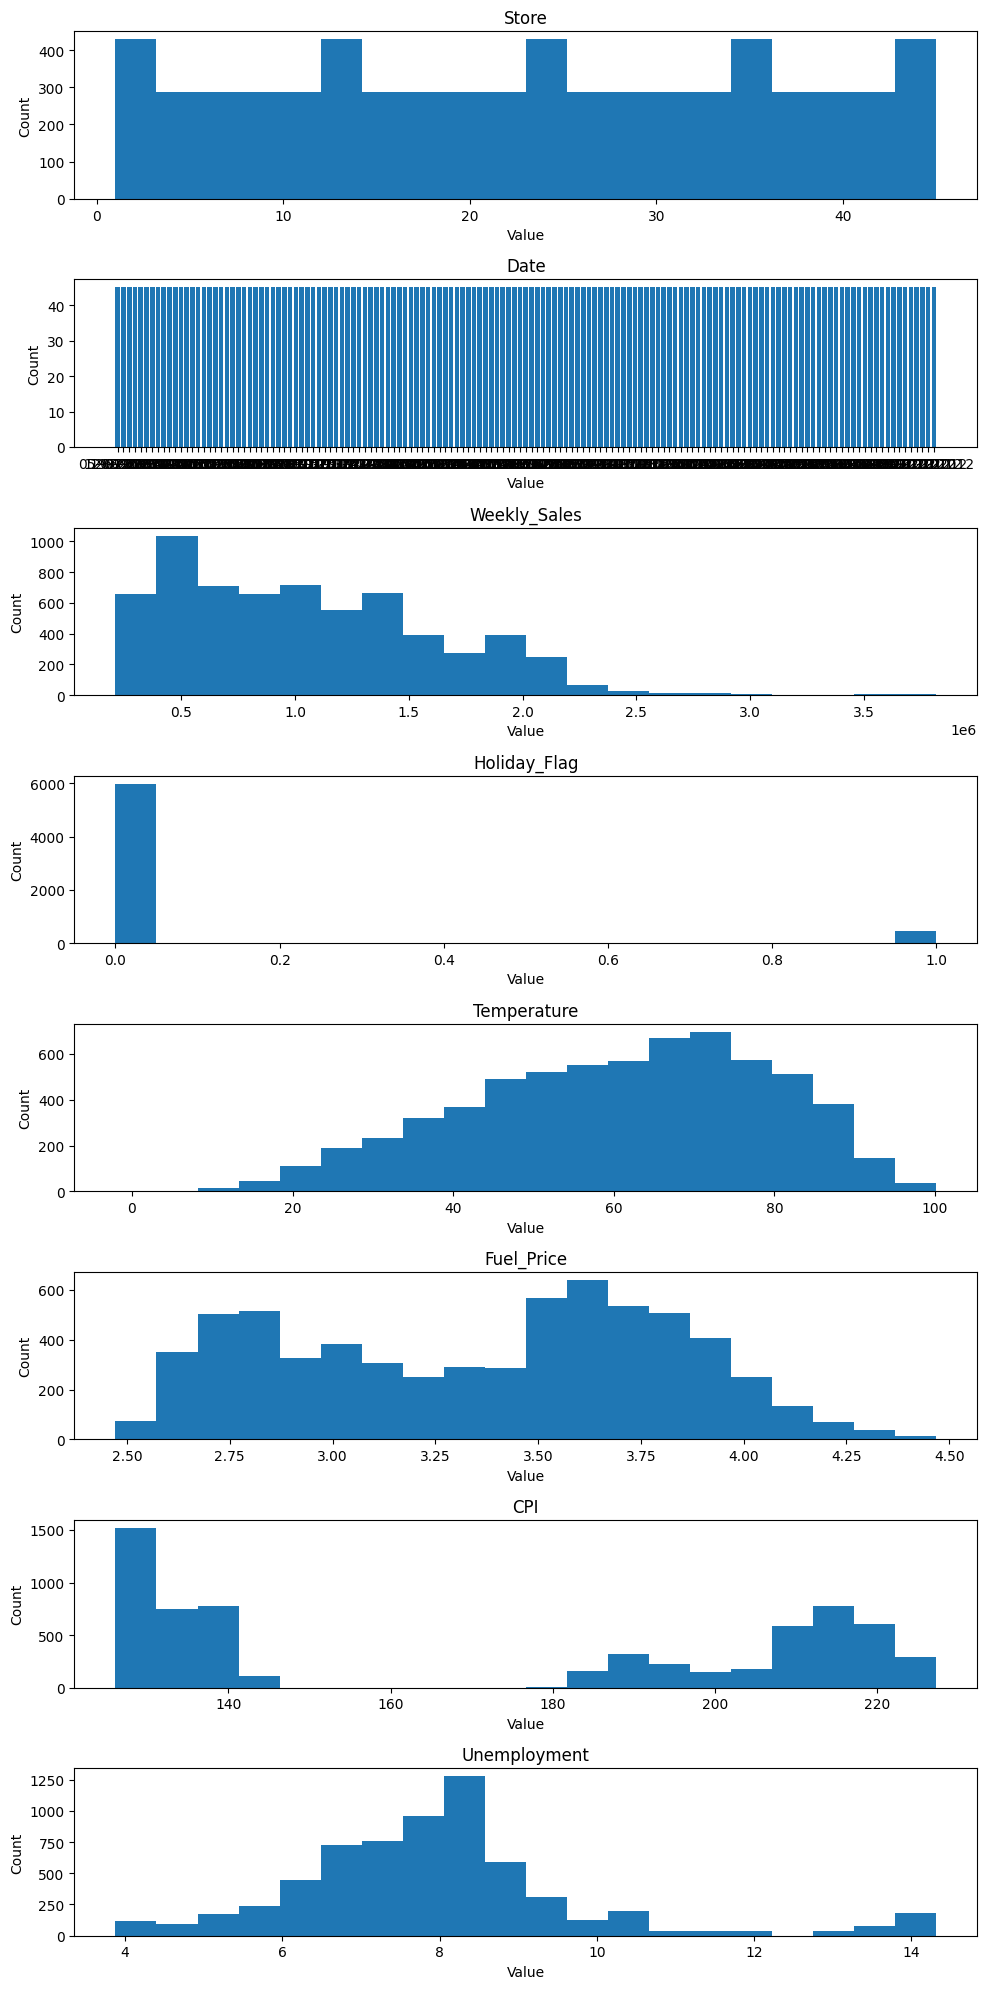

In [46]:
# Assuming 'df' is your DataFrame with features as columns
features = df.columns

# Create a figure with subplots
fig, axs = plt.subplots(nrows = len(features), figsize=(10, 20))

# Loop through each feature and create a bar plot or histogram depending on the data type
for i, feature in enumerate(features):
    # Check if the feature is numeric
    if df[feature].dtype == 'object':
        # Use bar plot for categorical features
        axs[i].bar(df[feature].value_counts().index, df[feature].value_counts())
    else:
        # Use histogram for continuous numerical features
        axs[i].hist(df[feature], bins=20)  # Adjust the number of bins as necessary

    # Set titles and labels
    axs[i].set_title(feature)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Count')

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()

In [47]:
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed', dayfirst = True)
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6435 entries, 0 to 6434
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 50.4 KB


In [50]:
df['day'] = df['Date'].dt.day 
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df[['day', 'month', 'year']].info()

KeyError: 'date'

## **Initializing X and y variables**

`Weekly_Sales`: This is a common choice for the target feature if you are predicting sales figures. For example, if you want to forecast the sales of a particular store for the upcoming weeks or months, Weekly_Sales would be your target feature.

### **Regression Tasks:**

Weekly_Sales is a `continuous numerical feature`, which makes it suitable for regression tasks. You would use historical sales data to predict future sales values.

`Example Models`: Linear Regression, ARIMA, Random Forest Regressor, etc.

In [48]:
# Define the target variable 'y' and feature variables 'X'

y = df['Weekly_Sales']  # Target variable
X = df.drop(columns=['Weekly_Sales'])  # Features (excluding the target variable)

In [49]:
# now train-test split the data into 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)